# Assignment Digital Signal & Image Processing
Giulia Benvenuto s4678610

## Fourier Transform
Compute the Fourier transform of:
$
\begin{equation}
f(t)= \alpha cos(w_0t) + \beta cos(w_1t)
\end{equation}
$ <br>

where:
* $\alpha$ and $\beta$ are sampled uniformly in the interval $[-1, 1]$
* $w_0$ is sampled uniformly in the interval $[1, 5]$
* $w_1$ is sampled uniformly in the interval $[10; 20]$

Comment the results you obtain in terms of $\delta$ functions.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

## Uniform sampling
$a$, $b$, $w_0$, and $w_1$ uniformly sampled in their given intervals with the ${\tt numpy.random.uniform}$ function.

In [29]:
a = np.random.uniform(-1, np.nextafter(1, 2))
b = np.random.uniform(-1, np.nextafter(1, 2))
w0 = np.random.uniform(1, np.nextafter(5, 6))
w1 = np.random.uniform(10, np.nextafter(20, 21))

In [30]:
print('a = {}'.format(a))
print('b = {}'.format(b))
print('w0 = {}'.format(w0))
print('w1 = {}'.format(w1))

a = 0.32708354586483
b = 0.8465989793383948
w0 = 2.0755074623709664
w1 = 10.56206767480092


## Create the signal f(t)
We have the sampling rate in hertz, according to which we sample the time values in the interval $[0, 2\pi]$ and we have the two $w$ values which are respectively the angular frequencies of the cosine and sine functions that are summed to get $f(t)$. 

In [31]:
# Sampling rate in Hz:
sampling_rate = 1000

# Acquisition time:
t_m = np.pi 

# Sampling time values:
time = np.arange(-t_m, t_m, 1 / sampling_rate) 

# Number of samples:
print("We consider %d samples"%time.size)

# The signal f(t):
# w0 = first angular frequency
# w1 = second angular frequency
f = (a * np.cos(w0 * time)) + (b * np.cos(w1 * time))
g = (a * np.cos(w0 * time))
h = (b * np.cos(w1 * time))

We consider 6284 samples


## Plot the signal f(t)
$f(t)$ is the sum of two cosine functions (real and even) that I called $g(t)$ and $h(t)$. 

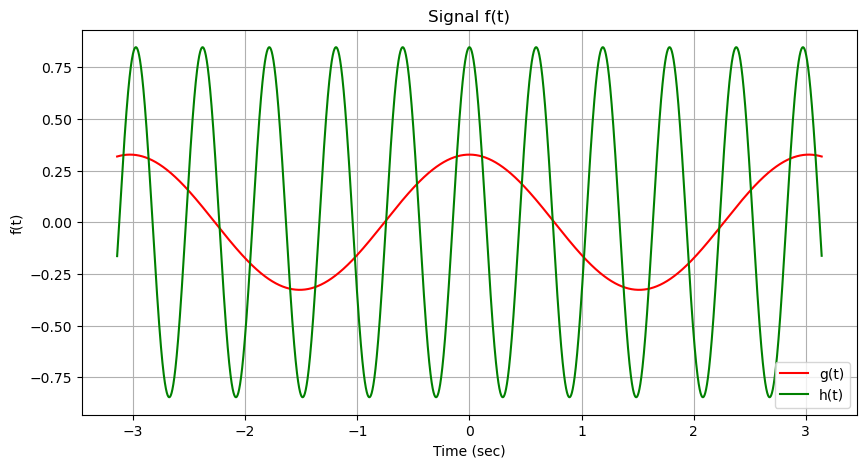

In [32]:
plt.plot(time, g, color='r', label='g(t)')
plt.plot(time, h, color='g', label='h(t)')
plt.title("Signal f(t)")
plt.legend(loc='lower right')
plt.xlabel("Time (sec)")
plt.ylabel("f(t)")
plt.grid(True)
plt.show()

Plot the signal $f(t)$ respect to the time. Since $g(t)$ and $h(t)$ are even and real then $f(t)$ will be even and real too. 

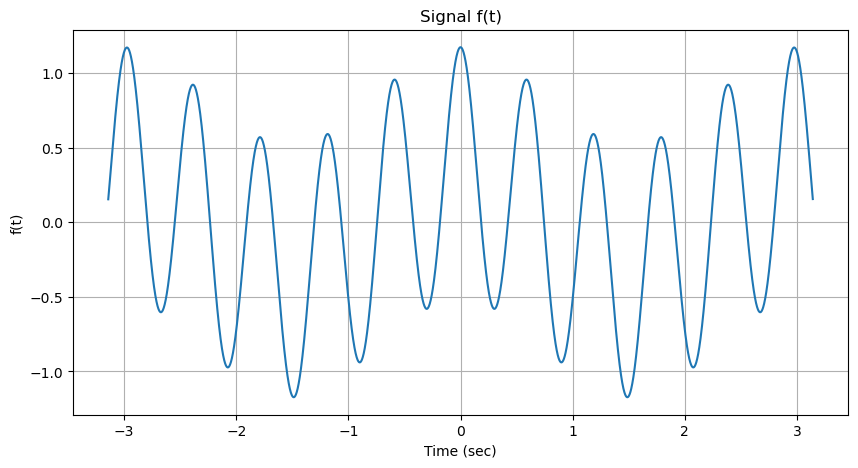

In [33]:
plt.plot(time, f)
plt.title("Signal f(t)")
plt.xlabel("Time (sec)")
plt.ylabel("f(t)")
plt.grid(True)
plt.show()

## Compute the Fourier Transform 
Using the ${\tt numpy}$ library I computed:
- The one-dimensional discrete Fourier Transform (DFT) with the efficient Fast Fourier Transform (FFT) algorithm.
- The matching vector of frequencies with ${\tt np.fft.fftfreq}$.
- The inverse FFT with with ${\tt np.fft.ifft}$, to get back to the original signal.

In [34]:
# Number of samples in time:
n = len(time) 

# Fourier Transform of f(f):
F = np.fft.fft(f) 

# Array of frequencies values:
freq = np.fft.fftfreq(n, 1/sampling_rate)

## Analysis of f(t) and F(w)
The signal $f(t)$ is the linear combination of two cosine functions, which are even. The sum of two even functions is again an even function and so I expect $f(t)$ to be even and real.

The operator $\mathcal{F}$ that associates its Fourier transform to a signal is linear. This property comes directly from the linearity of the integral. So if a signal is given by the linear combination of two signals (for example $x_1(t)$ and $x_2(t)$), then its spectrum is equal to the linear combination of the spectra of the two signals with the same coefficients:
<center>
$\mathcal{F} \{f(t)\} = \mathcal{F} \{\alpha_1 x_1 (t) + \alpha_2 x_2 (t) \} = \alpha_1 \mathcal{F} \{x_1 (t)\} + \alpha_2 \mathcal{F} \{x_2 (t)\} = F(w)$ 
</center> 
<br>
We also know that the Fourier Transform $F(w)$, generally is a complex-valued function:
<center>
    $F(w) = Re F(w) + j Im F(w) = |F(w)| e^{j \measuredangle{F(w)}}$
</center>
<br>
In particular if $f(t)$ is a real signal then:

- The real part of the spectum $Re F(w)$ is an even function of the frequency.
- The imaginary part of the spectrum $Im F(w)$ is an odd function of the frequency. 
- The module $|F(w)|$ of the spectrum is an even function of the frequency.
- The phase $\measuredangle{F(w)}$ of the spectrum is an odd function of the frequency.


<br>
<br>
The Fourier Transform of a cosine function is:
<center>
    $cos(w_x t) \longleftrightarrow \frac{1}{2}[\delta(w - w_x) + \delta(w + w_x)]$
</center>
This means that we will have two Dirac deltas, one centered in $-w_x$ and one centered in $+w_x$.

Since oure $f(t)$ function is a linear combination of cosines and the Fourier Transform is linear, the function $F(w)$ will be composed of four Dirac deltas, two centered in $-w_0$ and $+w_0$ and the other two centered in $-w_1$ and $+w_1$. Where the angular frequency $w = 2 \pi f$. Thus, since the plot on the x-axis has the frequencies values, two spikes will be placed in $+f_0$ and $-f_0$ where $f_0 = \frac{w_0}{2 \pi}$ and the other two spikes in $+f_1$ and $-f_1$ where $f_1 = \frac{w_1}{2 \pi}$.

In [35]:
f0 = w0 / (2 * np.pi)
print('Frequencies: f0 = {} and -f0 = {}'.format(f0, -f0))

f1 = w1 / (2 * np.pi)
print('Frequencies: f1 = {} and -f1 = {}'.format(f1, -f1))

Frequencies: f0 = 0.33032727206045526 and -f0 = -0.33032727206045526
Frequencies: f1 = 1.6810052797156878 and -f1 = -1.6810052797156878


## Plot the results
### Comment the results you obtain in terms of $\delta$ functions.

Since the cosine function is a real and even function, the linear combination of two cosines will be again a real and even function and its Fourier Transform will be a real and even function. 
<center>
$F(w) = \mathcal{F} \{f(t)\} = \mathcal{F} \{\alpha cos(w_0 t) + \beta cos(w_1 t) \} = \alpha \mathcal{F} \{cos(w_0 t)\} + \beta \mathcal{F} \{cos(w_1 t)\} = $ 
</center> 
<center>
$\frac{\alpha}{2}[2 \pi \delta(w - w_0) + 2 \pi \delta(w + w_0)] + \frac{\beta}{2}[2 \pi \delta(w - w_1) + 2 \pi \delta(w + w_1)] $ 
</center> 
In a simple and general case, all the Dirac deltas would be positive, but here they depend on the coefficients $\alpha$ and $\beta$, if they are negative, the correspondent Dirac deltas will be negative too. And as I expected they are positioned in $-f_0, +f_0, -f_1, +f_1$.

### Real part of F(w)
As I expected the real part of the Fourier Transform of $f(t)$ is an even function of the frequency. Here the Dirac deltas are in the estimated positions.

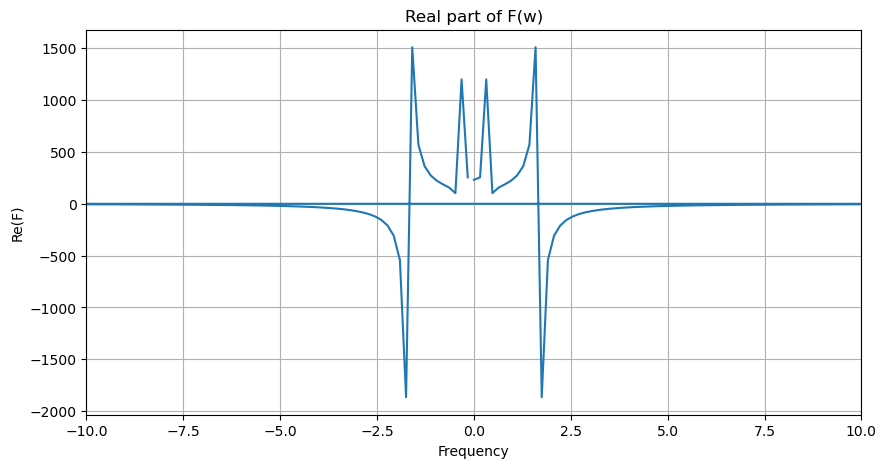

In [36]:
plt.plot(freq, np.real(F))
plt.xlim(-10, 10)
plt.title("Real part of F(w)")
plt.xlabel("Frequency")
plt.ylabel("Re(F)")
plt.grid(True)
plt.show()

### Imaginary part of F(w)
I didn't expect some spikes on the imaginary part since the Fourier Transform of a real and even function is again a real end even function. However, the value of these Dirac deltas is so small that it can be considered negligible. This is probably due to some numerical errors or approximations when computing the transform. 

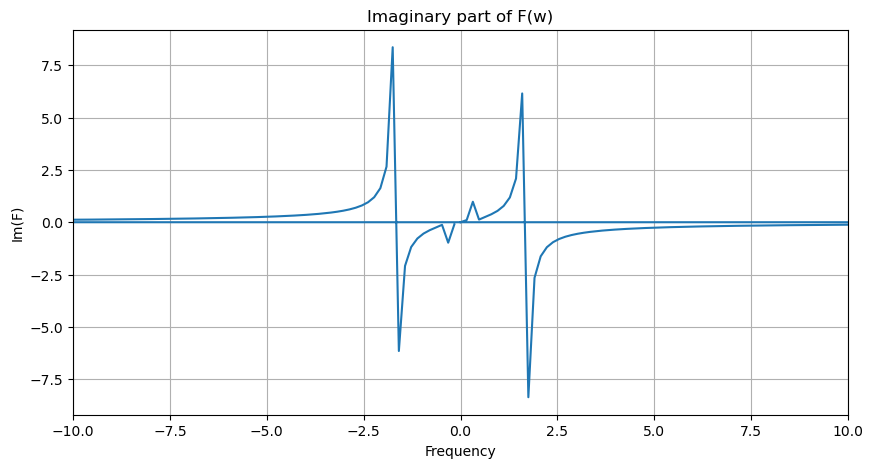

In [37]:
plt.plot(freq, np.imag(F))
plt.xlim(-10, 10)
plt.title("Imaginary part of F(w)")
plt.xlabel("Frequency")
plt.ylabel("Im(F)")
plt.grid(True)
plt.show()

### Check if the Imaginary part is negligible
I used the ${\tt np.isclose}$ function to check if the imaginary part of the Fourier transform is close to zero and thus negligible.

I set the tolerance, within which the imaginary part is considered similar to zero, equal to 1% of the maximum value of the module of the transform, if the imaginary part is smaller respect to that tolerance value then the *is_close* value will be ${\tt True}$ otherwise it will be ${\tt False}$. 

Then with the ${\tt np.all}$ function I checked that all the values inside *is_close* were True. 

In [38]:
tolerance = (1/100) * max(abs(F)) #1%
is_close = np.isclose(F.imag, 0, atol=tolerance)

print(is_close)
print('The imaginary part is negligible: {}'.format(np.all(is_close)))

[ True  True  True ...  True  True  True]
The imaginary part is negligible: True


### Module of F(w)
The absolute value of the Fourier Transform is also known as "power spectrum", it gives the amplitude of the different frequency components of the signal, in fact it's often used to analyze the frequency content of a signal. 

When the input signal is real (as in this case), the negative frequency components are the complex conjugate of the positive frequency components, this means that the negative part of the power spectrum contains the same informations of the positive part.

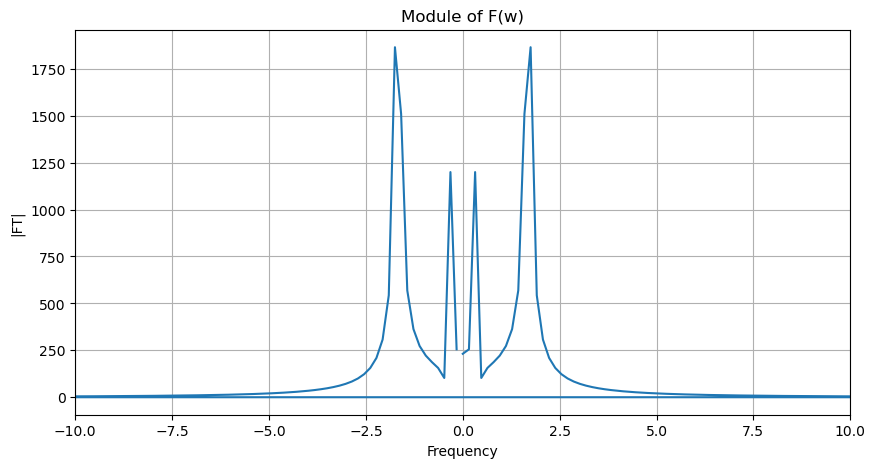

In [39]:
plt.plot(freq, np.abs(F))
plt.xlim(-10, 10)
plt.title("Module of F(w)")
plt.xlabel("Frequency")
plt.ylabel("|FT|")
plt.grid(True)
plt.show()

### Reconstruction of f(t)
We reconstruct the original signal through the Inverse Fourier Transform

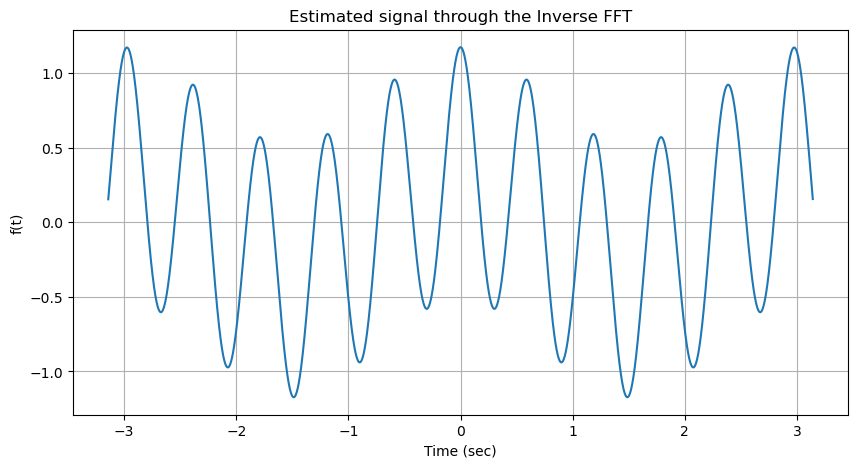

In [40]:
f_est = np.fft.ifft(F)

plt.plot(time, np.real(f_est))
plt.title("Estimated signal through the Inverse FFT")
plt.xlabel("Time (sec)")
plt.ylabel("f(t)")
plt.grid(True)
plt.show()